In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from matplotlib.patches import Rectangle
import matplotlib.animation as animation
from IPython.display import HTML
from IPython.display import Image
import glob
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score


import os
if "NOTEBOOK_DIR" not in globals():
    NOTEBOOK_DIR = os.getcwd()
    print('Notebook Directory Set:', os.getcwd())

os.chdir(os.path.join(NOTEBOOK_DIR, ".."))
print("Current working directory:", os.getcwd())

Current working directory: /shared_folder/eas_508_project


In [14]:
file_names = sorted(glob.glob('data/evals/*1046.csv'))
files = [pd.read_csv(file) for file in file_names]
file_names = [file.split('/')[-1].split('_')[0] for file in file_names]

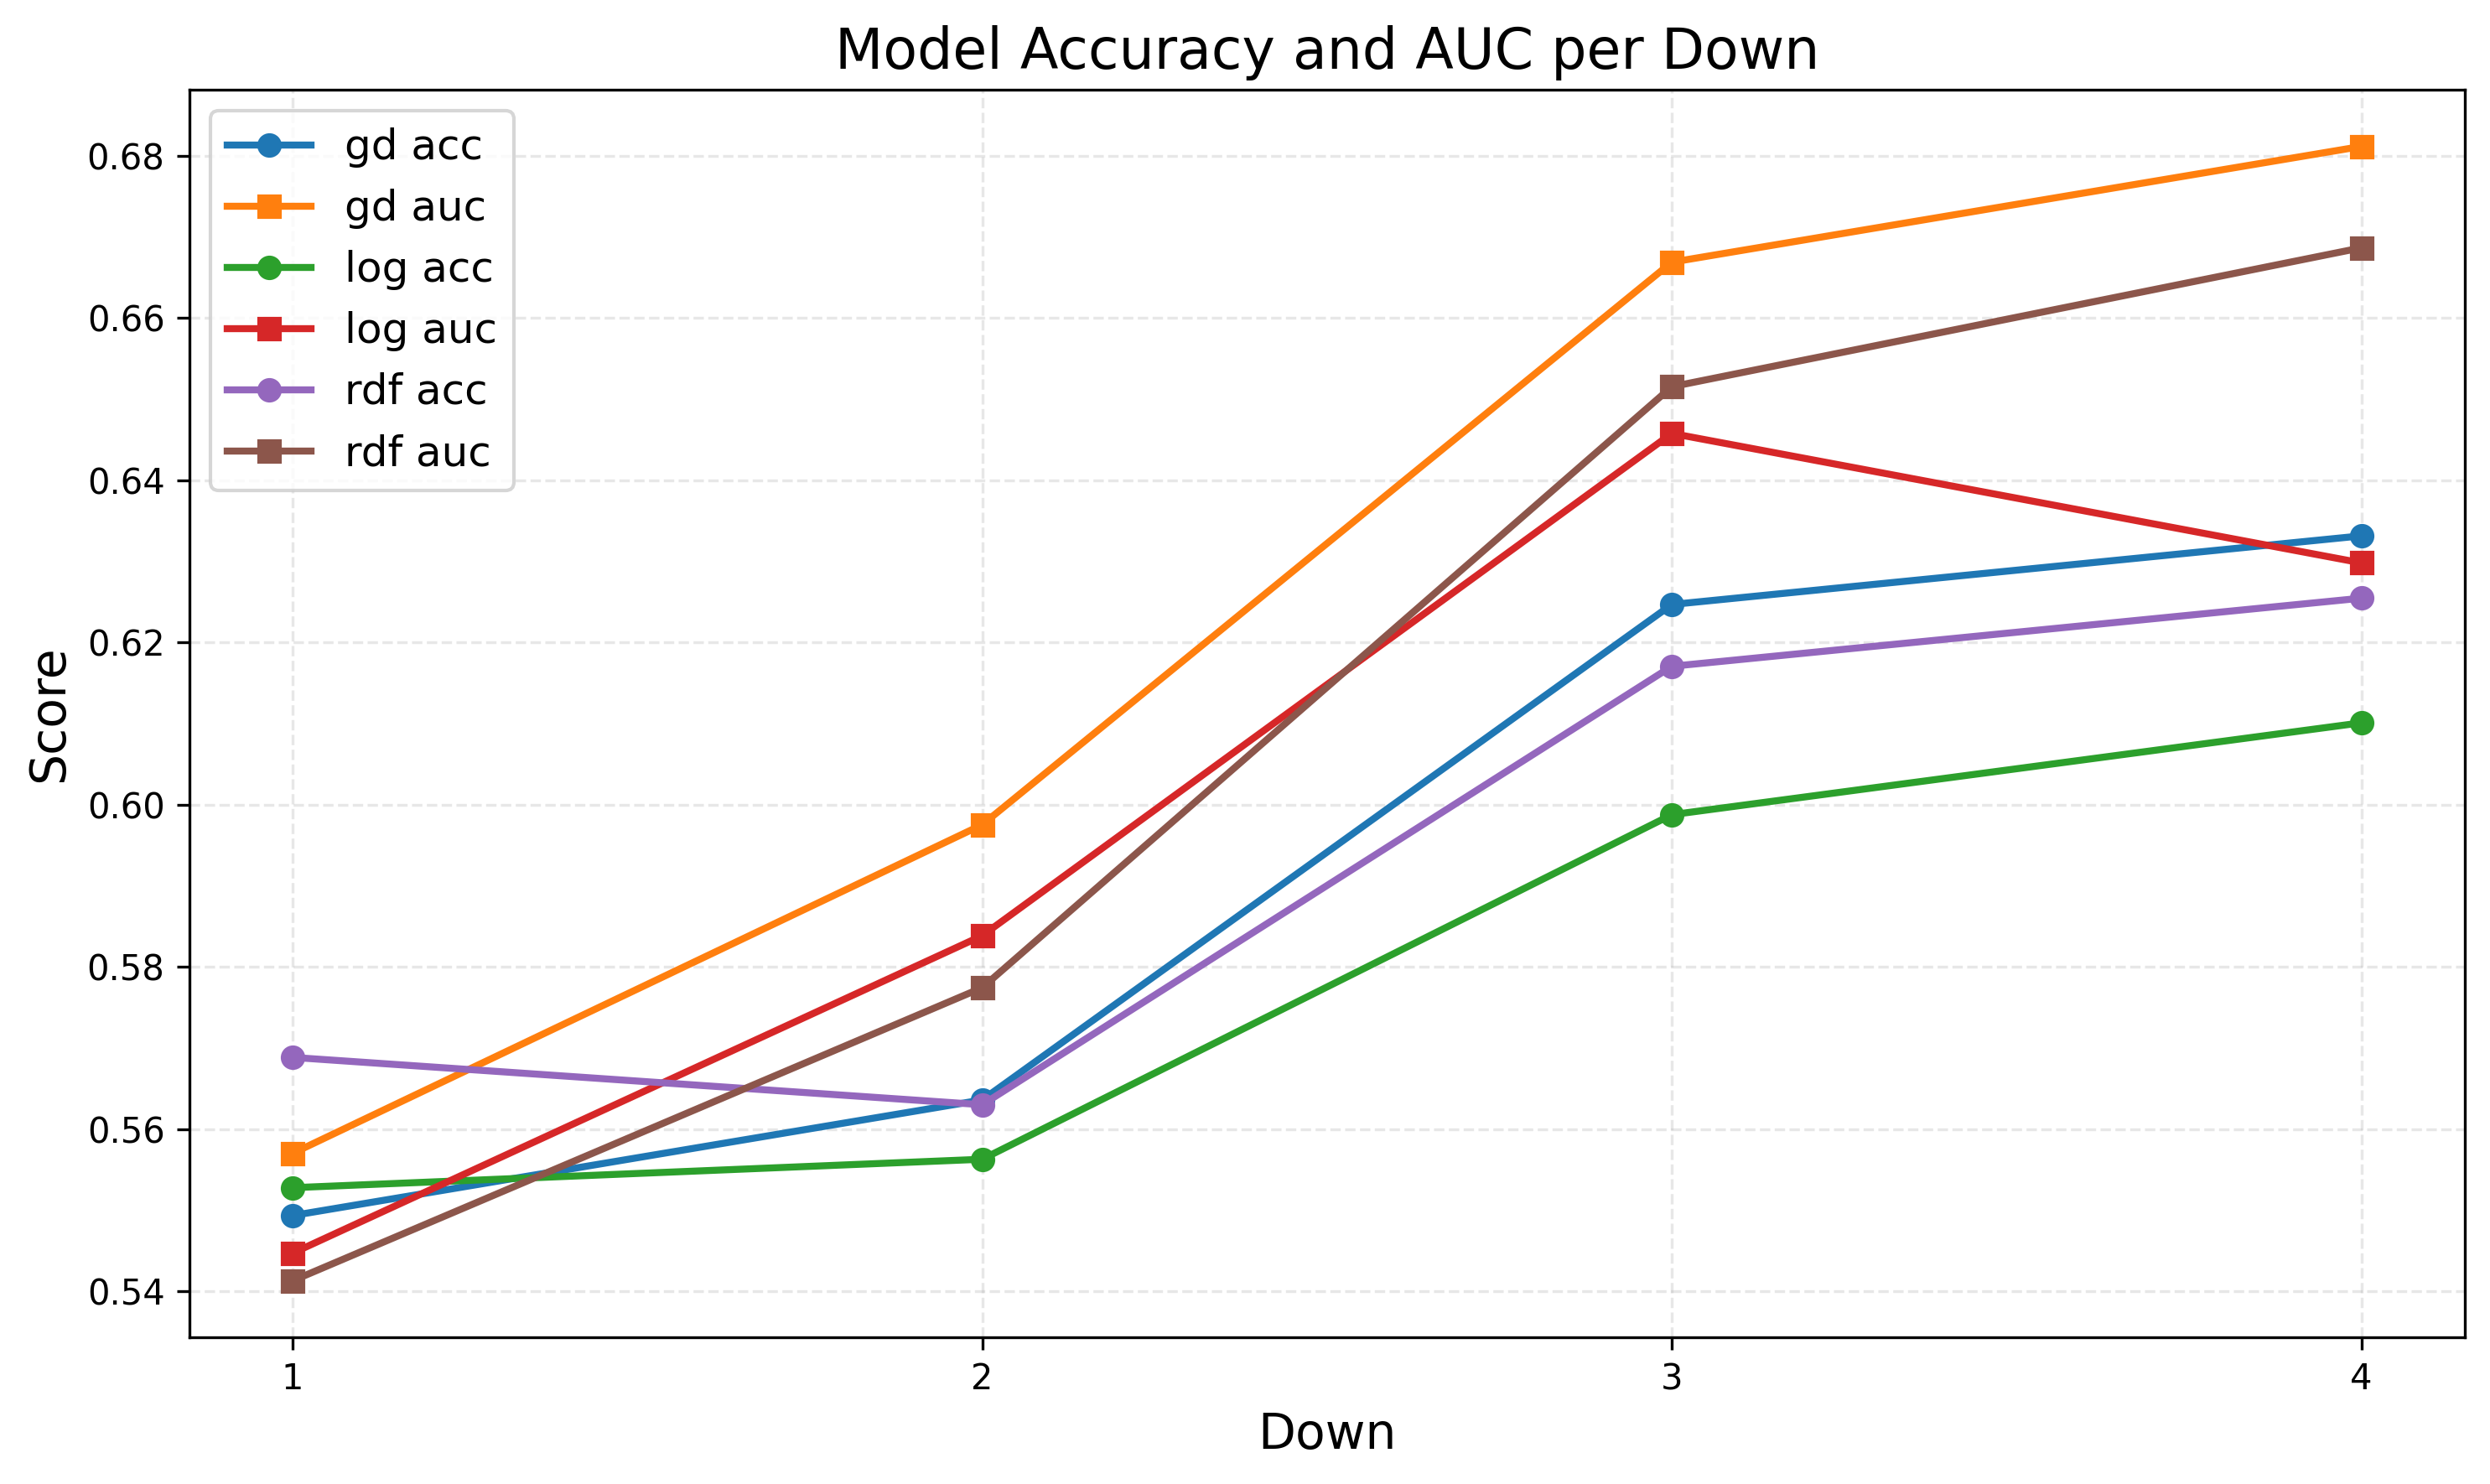

In [17]:
acc_scores = []
auc_scores = []

downs = [1,2,3,4]
for df in files:
    temp_acc = []
    temp_auc = []

    for down in downs:
        temp = df[df['down'] == down]

        y_true = temp['success']
        y_pred = temp['pred']
        y_prob = temp['prob']

        acc = accuracy_score(y_true,y_pred)
        auc = roc_auc_score(y_true, y_prob)

        temp_acc.append(acc)
        temp_auc.append(auc)

    acc_scores.append(temp_acc)
    auc_scores.append(temp_auc)

plt.figure(figsize=(10, 6), dpi=300)
for idx, df in enumerate(files):
    plt.plot(downs, acc_scores[idx], marker="o", label=f"{file_names[idx]} acc", linewidth=2)
    plt.plot(downs, auc_scores[idx], marker="s", label=f"{file_names[idx]} auc", linewidth=2)

plt.title("Model Accuracy and AUC per Down", fontsize=16)
plt.xlabel("Down", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.xticks(downs)
plt.grid(True, linestyle="--", alpha=0.3)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

In [19]:
df = files[0]

In [24]:
df[(df['down'] == 4) | (df['down'] == 3)]['success'].mean()

np.float64(0.43270826928988626)

In [40]:
df.columns

Index(['nflverse_game_id', 'play_id', 'down', 'defenders_in_box', 'RB', 'TE',
       'WR', 'OL', 'DL', 'LB', 'DB', 'home', 'qtr',
       'quarter_seconds_remaining', 'pass_run_ratio', 'success',
       'ydstosuccess', 'yardline_100', 'score_differential', 'spread',
       'total_line', 'QB1', 'QB2', 'RB1', 'RB2', 'WR1', 'WR2', 'WR3', 'TE1',
       'TE2', 'pass_yards_season', 'rush_yards_season',
       'offense_formation_PISTOL', 'offense_formation_SHOTGUN',
       'offense_formation_UNDER_CENTER', 'pred', 'prob'],
      dtype='object')

<Axes: xlabel='defenders_in_box', ylabel='prob'>

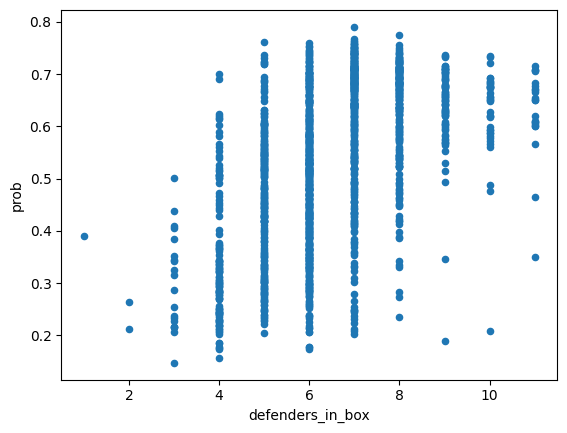

In [41]:
df.plot('defenders_in_box','prob', kind='scatter')

<Axes: xlabel='ydstogo', ylabel='prob'>

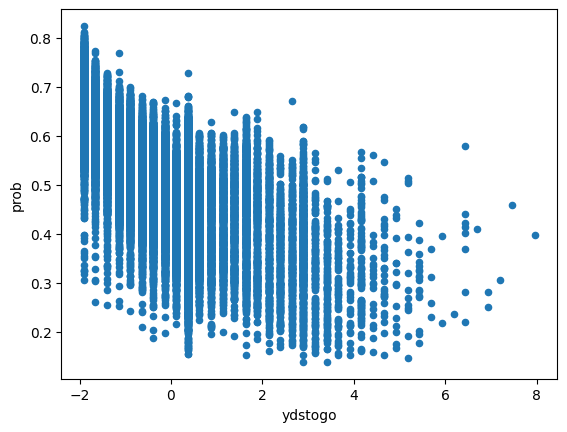

In [26]:
df.plot('ydstogo','prob', kind='scatter')

<Axes: xlabel='rush_yards_season', ylabel='prob'>

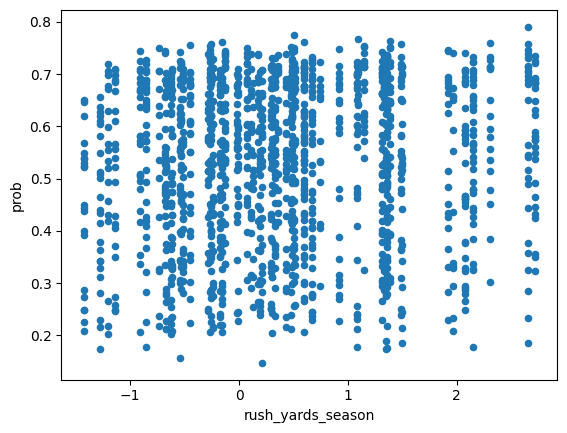

In [43]:
df.plot('rush_yards_season','prob', kind='scatter')

In [44]:
df['pred'].mean()

np.float64(0.6197183098591549)

In [45]:
df['prob'].mean()

np.float64(0.530685609603073)

In [53]:
df[(df['success'] == 1) & (df['prob'] > .45) & (df['prob'] < .5)]['offense_formation_SHOTGUN'].mean()

np.float64(0.967741935483871)

In [ ]:
df[(df['success'] == 1) & (df['prob'] > .45) & (df['prob'] < .5)]['QB1'].mean()

np.float64(-0.5888810462696226)

In [64]:
for i in np.arange(.4, .6, .005):
    df[f'{i}_prob'] = (df['prob'] > i).astype(int)
    df[f'{i}_succ'] = (df[f'{i}_prob'] == df['success']).astype(int)

In [65]:
df

,nflverse_game_id,play_id,down,defenders_in_box,RB,TE,WR,OL,DL,LB,...,0.5500000000000002_succ,0.5550000000000002_succ,0.5600000000000002_succ,0.5650000000000002_succ,0.5700000000000002_succ,0.5750000000000002_succ,0.5800000000000002_succ,0.5850000000000002_succ,0.5900000000000002_succ,0.5950000000000002_succ
22,2022_01_BAL_NYJ,3419,4.0,8.0,1,1,3,5,2,4,...,1,1,1,1,1,1,1,1,1,1
24,2022_01_BAL_NYJ,3551,4.0,5.0,1,1,3,5,2,3,...,0,0,0,0,0,0,0,0,0,0
26,2022_01_BAL_NYJ,3647,4.0,5.0,1,1,3,5,2,3,...,1,1,1,1,1,1,1,1,1,1
29,2022_01_BAL_NYJ,4047,4.0,4.0,1,1,3,5,2,3,...,0,0,0,0,0,0,0,0,0,0
40,2022_01_BUF_LA,1358,4.0,7.0,1,1,3,5,4,2,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16205,2023_21_KC_BAL,535,4.0,8.0,2,2,0,6,6,2,...,1,1,1,1,1,1,1,1,1,1
16213,2023_21_KC_BAL,1347,4.0,10.0,1,2,2,5,3,4,...,0,0,0,0,0,0,0,0,0,0
16227,2023_21_KC_BAL,3511,4.0,6.0,1,1,3,5,4,1,...,0,0,0,0,0,0,0,0,0,0
16253,2023_22_SF_KC,3156,4.0,6.0,1,1,3,5,4,2,...,1,0,0,0,0,0,0,0,0,0


In [69]:
mean_df = df.drop(columns=['nflverse_game_id','play_id'])

In [73]:
print(mean_df.mean().to_dict())

{'down': 4.0, 'defenders_in_box': 6.463508322663253, 'RB': 1.058258642765685, 'TE': 1.2848911651728554, 'WR': 2.556978233034571, 'OL': 5.069782330345711, 'DL': 3.1702944942381563, 'LB': 2.88348271446863, 'DB': 4.925096030729834, 'home': 0.47439180537772085, 'qtr': 3.0492957746478875, 'quarter_seconds_remaining': 354.93341869398205, 'pass_run_ratio': 1.6200963377158297, 'success': 0.5128040973111395, 'ydstosuccess': -0.25272015789513885, 'yardline_100': -0.5702859604141941, 'score_differential': -0.4116947440744509, 'spread': -0.0037717157355531676, 'total_line': -0.3533517394356805, 'QB1': -0.40069943931312507, 'QB2': -0.0274963646546837, 'RB1': -0.1600784480743886, 'RB2': -0.11573602965653455, 'WR1': -0.23066622545641666, 'WR2': -0.13423962745872717, 'WR3': 0.1661175481821086, 'TE1': -0.06008034481944404, 'TE2': -0.0669760589816902, 'pass_yards_season': -0.046361708387575015, 'rush_yards_season': 0.40078848491695673, 'offense_formation_PISTOL': 0.016005121638924456, 'offense_formation